#Predicting the antimicrobial activity of peptides

I got the idea for this project from the paper Deep-AmPEP30: Imporove Short Antimicrobial Peptides Prediction with Deep Learnin.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7256447/

The basic idea of this project is to predict the percentages of different amino acids in peptides that either have negative antimicrobial effects or possitive antimicrobial effects.

In [7]:
#Installing conda
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [8]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-09-08 00:19:57--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M   132MB/s    in 0.6s    

2024-09-08 00:19:58 (132 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / WARNING conda.core.solve:_add_specs(601): pinned spec python=3.10 conflicts with explicit specs.  Overriding pinned spec.
- \ | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::setuptools==68.2.2=

In [9]:
# As of making this project the current conda version is 23.11.0
!conda --version

conda 24.7.1


#Install and download Pfeature
I'm using the Pfeatures library in order to compute the properties of amino acid chains. Which is in turn going to be used to predict the molecular properties of peptides.

In [10]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

--2024-09-08 00:20:27--  https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip [following]
--2024-09-08 00:20:28--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519486 (507K) [application/zip]
Saving to: ‘Pfeature.zip.1’

Pfeature.zip.1      100%[===================>] 507.31K  --.-KB/s    in 0.04s   

2024-09-08 00:20:28 (13.9 MB/s) - ‘Pfeature.zip.1’ saved [519486/519486]



In [11]:
! unzip Pfeature.zip

Archive:  Pfeature.zip
replace Pfeature/PKG-INFO? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
%cd Pfeature

/content/Pfeature


In [13]:
! python setup.py install

/usr/local/lib/python3.10/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://github.com/py

In [14]:
import Pfeature

#Installing CD-HIT
Using CD-HIT to filter out redundency in the peptide sequences to get a unique sibset of peptides so that the model isn't bias.

In [15]:
! conda install -c bioconda cd-hit -y

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: \ | / done

# All requested packages already installed.



#Downloading Peptide dataset

In [16]:
#Positive dataset
! wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta

--2024-09-08 00:22:20--  https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52619 (51K) [text/plain]
Saving to: ‘train_po.fasta.1’

train_po.fasta.1    100%[===================>]  51.39K  --.-KB/s    in 0.008s  

2024-09-08 00:22:20 (6.59 MB/s) - ‘train_po.fasta.1’ saved [52619/52619]



In [17]:
#Negative dataset
! wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta

--2024-09-08 00:22:20--  https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57206 (56K) [text/plain]
Saving to: ‘train_ne.fasta.1’

train_ne.fasta.1    100%[===================>]  55.87K  --.-KB/s    in 0.009s  

2024-09-08 00:22:20 (6.27 MB/s) - ‘train_ne.fasta.1’ saved [57206/57206]



#What the dataset contains

Each entry will have the identification name of the peptide followed by the peptide sequence.

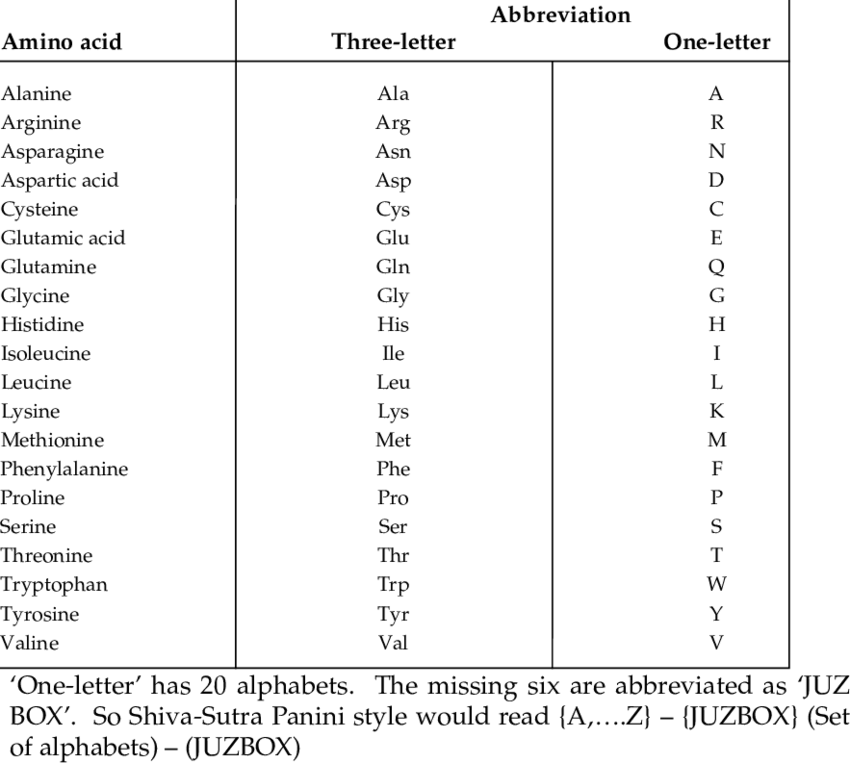

In [18]:
! head train_po.fasta

>amp5_30_1
ACSAG
>amp5_30_2
AMVGT
>amp5_30_3
AMVSS
>amp5_30_4
CPFVC
>amp5_30_5
SPGGA


#Removing redundant sequences using CD-HIT

In [19]:
! cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1 (+OpenMP), Apr 11 2024, 11:47:57
Command: cd-hit -i train_po.fasta -o train_po_cdhit.txt -c
         0.99

Started: Sun Sep  8 00:22:21 2024
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 16M = 16M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 81M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 89796593

comparing sequences from          0  to       1445
.
     1445  finished       1337  clusters

Approximated maximum memory consumption: 81M
writing new database
writing clustering information
program completed !

Total CPU time 0.12


In [20]:
! cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1 (+OpenMP), Apr 11 2024, 11:47:57
Command: cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c
         0.99

Started: Sun Sep  8 00:22:21 2024
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 16M = 16M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 81M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 89796051

comparing sequences from          0  to       1445
.
     1445  finished       1422  clusters

Approximated maximum memory consumption: 81M
writing new database
writing clustering information
program completed !

Total CPU time 0.12


In [21]:
#List of files generated
! ls -l

total 3160
drwxr-xr-x 4 root root    4096 Sep  8 00:07 build
-rw-r--r-- 1 root root    4332 Nov 10  2023 cuda-keyring_1.0-1_all.deb
drwxr-xr-x 2 root root    4096 Sep  8 00:07 dist
-rw-r--r-- 1 root root   86079 Sep 29  2020 Functions_Tables.pdf
-rw-r--r-- 1 root root   17294 Nov 10  2023 NGC-DL-CONTAINER-LICENSE
drwxr-xr-x 3 root root    4096 Sep  8 00:07 Pfeature
-rw-r--r-- 1 root root  221146 Sep 29  2020 Pfeature_Descriptors.pdf
drwxr-xr-x 2 root root    4096 Sep  8 00:21 Pfeature.egg-info
-rw-r--r-- 1 root root     971 Sep 28  2020 PKG-INFO
-rw-r--r-- 1 root root    1265 Sep 29  2020 README
-rw-r--r-- 1 root root    1267 Sep 29  2020 setup.py
-rw-r--r-- 1 root root  130978 Sep  8 00:13 train_ne_cdhit.aac.csv
-rw-r--r-- 1 root root   54341 Sep  8 00:22 train_ne_cdhit.txt
-rw-r--r-- 1 root root   61425 Sep  8 00:22 train_ne_cdhit.txt.clstr
-rw-r--r-- 1 root root   57206 Sep  8 00:08 train_ne.fasta
-rw-r--r-- 1 root root   57206 Sep  8 00:22 train_ne.fasta.1
-rw-r--r-- 1 root root  1

In [22]:
#Number of peptides before CD-HIT
! grep ">" train_po.fasta | wc -l

1529


In [23]:
#Number of peptides after CD-HIT
! grep ">" train_po_cdhit.txt | wc -l

1337


In [24]:
#Number of peptides before CD-HIT
! grep ">" train_ne.fasta | wc -l

1529


In [25]:
#Number of peptides after CD-HIT
! grep ">" train_ne_cdhit.txt | wc -l

1422


# This is a list of all the features that can be created using the Pfeatures library

Feature claass | Description | Function
---|---|---
AAC | Amino acid composition | aac_wp
DPC | Dipeptide composition | dpc_wp
TPC | Tripeptide composition | tpc_wp
ABC | Atom and bond composition | atc_wp, btc_wp
PCP | Physico-chemical properties | pcp_wp
AAI | Amino acid index composition | aai_wp
RRI | Repetitive Residue Information | rri_wp
DDR | Distance distribution of residues |ddr_wp
PRI | Physico-chemical properties repeat composition | pri_wp
SEP | Shannon entropy | sep_wp
SER | Shannon entropy of residue level | ser_wp
SPC | Shannon entropy of physicochemical property | spc_wp
ACR | Autocorrelation | acr_wp
CTC | Conjoint Triad Calculation | ctc_wp
CTD | Composition enhanced transition distribution | ctd_wp
PAAC | Pseudo amino acid composition | paac_wp
APAAC | Amphiphilic pseudo amino acid composition | apaac_wp
QSO | Quasi sequence order | qos_wp
SOC | Sequence order coupling | soc_wp

In [26]:
import pandas as pd

In [27]:
# Amino acid composition (AAC)
# the wp at the end of "aac_wp" means that this code is computing the properties for the entire peptide
from Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

aac('train_po_cdhit.txt')

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,10.00,0.00,3.33,3.33,6.67,20.00,0.00,3.33,13.33,13.33,3.33,0.00,0.00,3.33,0.00,6.67,3.33,10.00,0.00,0.00
1333,6.67,3.33,0.00,0.00,3.33,20.00,6.67,3.33,3.33,6.67,0.00,6.67,0.00,3.33,6.67,10.00,3.33,13.33,3.33,0.00
1334,13.33,0.00,0.00,3.33,0.00,3.33,13.33,0.00,0.00,10.00,0.00,0.00,16.67,6.67,16.67,6.67,3.33,0.00,0.00,6.67
1335,6.67,0.00,6.67,6.67,0.00,6.67,3.33,6.67,6.67,26.67,0.00,3.33,0.00,10.00,10.00,3.33,3.33,0.00,0.00,0.00


In [ ]:
# Dipeptide composition (DPC)

from Pfeature.pfeature import dpc_wp

def dpc(input):
  a = input.rstrip('txt')
  output = a + 'dpc.csv'
  df_out = dpc_wp(input, output, 1)
  df_in = pd.read_csv(output)
  return df_in

feature = dpc('train_po_cdhit.txt')
feature

#Combining both Negative and Positive

In [ ]:
pos = 'train_po_cdhit.txt'
neg = 'train_ne_cdhit.txt'

def feature_calc(po, ne, feature_name):
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

feature = feature_calc(pos, neg, aac) # AAC
# Since DPC takes a while to calculate I commented it out since it was already ran above
#feature = feature_calc(pos, neg, dpc) # DPC
feature

# Data Pre-processing

In [ ]:
# Assigns the features to X and class label to Y
X = feature.drop('class', axis=1)
y = feature['class'].copy()

In [ ]:
y = y.map({'positive': 1, 'negative': 0})

There are a total of 2759 different peptides that are both positive and negative in this dataframe.

In [ ]:
X.shape

In [ ]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

In [ ]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

In [ ]:
#installing lazypredict library for fast model creation
! pip install lazypredict

In [ ]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature.drop('class', axis=1)
y = feature['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
#models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
models_train

In [ ]:
models_test

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

#Building Random forest model

In [ ]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
feature['class']

In [ ]:
# Simplest and quickest way to obtain the model performance (Accuracy)
rf.score(X_test,y_test)

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

In [ ]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

In [ ]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report)
f.close()

In [ ]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test, y_test)
plt.show()

In [ ]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [ ]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

In [ ]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [ ]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

In [ ]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")